
---

## Introduction

This project focuses on building and evaluating machine learning models to classify mushrooms as **edible** or **poisonous** using the **Mushroom Dataset** from Kaggle.  
The workflow starts with **data preprocessing**, including checking for missing and duplicate values, exploring class distribution, and encoding categorical features using `LabelEncoder`. Since the classes are already balanced, no sampling techniques like SMOTE are required.  

Exploratory analysis includes feature correlation visualization and feature importance ranking using **Random Forest**.  

Two main modeling approaches are implemented:  
1. **Deep Learning Approach** – An Artificial Neural Network (ANN) built with TensorFlow/Keras, including dropout layers and L2 regularization to avoid overfitting, and optimized with early stopping.  
2. **Classical Machine Learning Approach** – Multiple models (Random Forest, Gradient Boosting, KNN, Logistic Regression) are compared using Grid Search with cross-validation to find the best hyperparameters.  

The final step involves comparing the performance of the ANN with the best-performing classical model to determine the most effective strategy for mushroom classification.

**Dataset Source:** [Kaggle - Mushroom Classification Dataset](https://www.kaggle.com/datasets/uciml/mushroom-classification)



In [39]:
import pandas as pd 

read the file 

In [40]:
df=pd.read_csv(r"D:\pyhton\#\project 1\machin learning\csv\mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


get the info 

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

result: there is no non value in dataset 

In [42]:
df.duplicated().sum()

np.int64(0)

there is no duplicated value too!

lets see hoe claces are ... so we need smote or not ! :)

In [43]:
import matplotlib.pyplot as plt 
import seaborn as sns

C:\Users\p-fr\AppData\Local\Temp\ipykernel_18012\2814453710.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


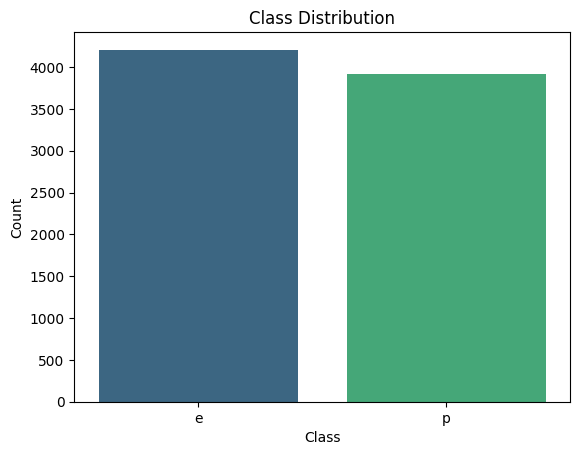

In [44]:
class_counts = df['class'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

don't need smot!bacause clasess are blance !

lent's start to encode it ...

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for name in df.columns:
    df[name]=le.fit_transform(df[name])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


mark X and Y

In [46]:
x=df.drop("class" , axis=1)
y=df["class"]

# train/test

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# scaling

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # only transform for test

# plots :

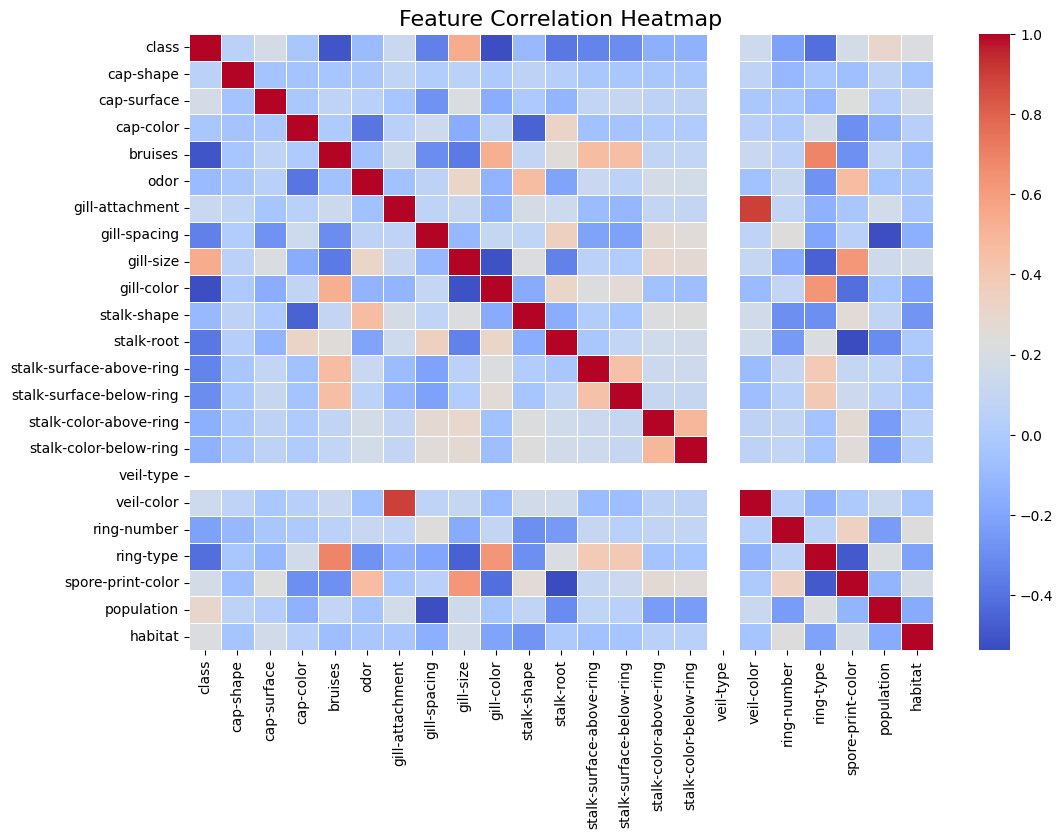

In [49]:
#  Feature Correlation Matrix
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()


find the best feature :

                     Feature  Importance
4                       odor    0.168763
8                 gill-color    0.104928
7                  gill-size    0.102314
19         spore-print-color    0.102157
18                 ring-type    0.071604
20                population    0.061682
10                stalk-root    0.059670
3                    bruises    0.057066
11  stalk-surface-above-ring    0.046913
6               gill-spacing    0.044109
12  stalk-surface-below-ring    0.043719
21                   habitat    0.032914
9                stalk-shape    0.019656
13    stalk-color-above-ring    0.017852
17               ring-number    0.015815
14    stalk-color-below-ring    0.015215
2                  cap-color    0.015194
1                cap-surface    0.009279
0                  cap-shape    0.004552
16                veil-color    0.003535
5            gill-attachment    0.003064
15                 veil-type    0.000000


C:\Users\p-fr\AppData\Local\Temp\ipykernel_18012\1411881517.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importances, x='Importance', y='Feature', palette='viridis')


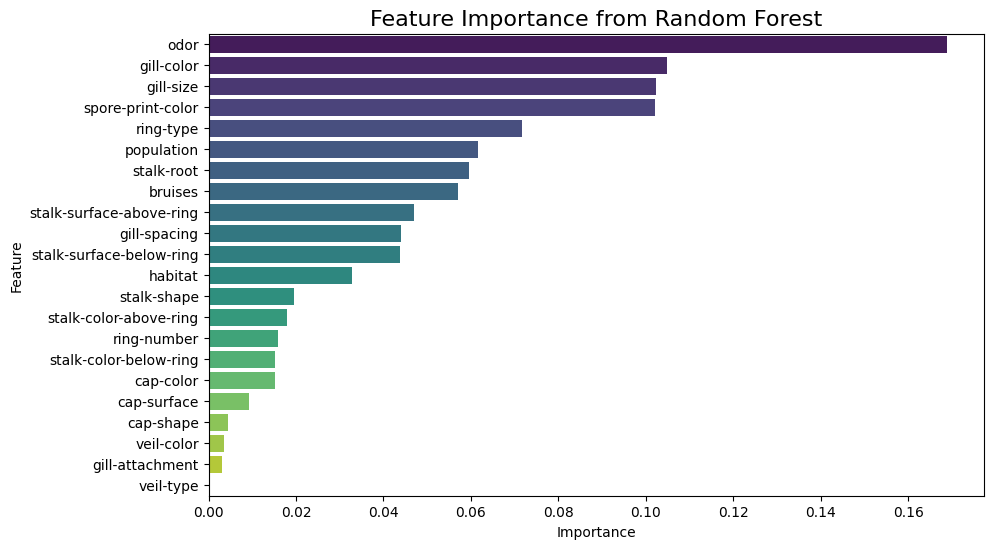

In [50]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# RandomForest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# importance :
importances = rf_model.feature_importances_

# make DataFrame 
feat_importances = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


print(feat_importances)

# plot
plt.figure(figsize=(10,6))
sns.barplot(data=feat_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest', fontsize=16)
plt.show()


part 1 
# ANN

change the data set to a tensorflow one :

In [51]:
import tensorflow as tf

# Create Dataset
train_dataset = (
    tf.data.Dataset.from_tensor_slices((X_train, y_train))
    .shuffle(len(X_train))
    .batch(16)
    .prefetch(tf.data.AUTOTUNE)
)



make test dataset as train one :

In [52]:
test_dataset = (
    tf.data.Dataset.from_tensor_slices((X_test, y_test))
    .batch(16)
    .prefetch(tf.data.AUTOTUNE)
)

make the model:

In [53]:
X_train.shape

(5686, 22)

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(22,)),  # input features
    
    tf.keras.layers.Dense(64, activation='relu', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(32, activation='relu', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(16, activation='relu', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(8, activation='relu', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(2, activation='softmax')  # output layer
])


### compile the model :

In [55]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [56]:
from tensorflow.keras.callbacks import EarlyStopping


In [57]:
# EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',         # Watch the validation loss
    patience=3,                 # Wait 3 epochs with no improvement
    restore_best_weights=True   # Roll back to the best weights
)
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7223 - loss: 1.4065 - val_accuracy: 0.9192 - val_loss: 0.9084
Epoch 2/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8989 - loss: 0.8347 - val_accuracy: 0.9675 - val_loss: 0.5681
Epoch 3/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9474 - loss: 0.5507 - val_accuracy: 0.9842 - val_loss: 0.3766
Epoch 4/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9705 - loss: 0.3858 - val_accuracy: 0.9965 - val_loss: 0.2686
Epoch 5/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9822 - loss: 0.2879 - val_accuracy: 0.9991 - val_loss: 0.2128
Epoch 6/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9842 - loss: 0.2467 - val_accuracy: 1.0000 - val_loss: 0.1779
Epoch 7/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9883 - loss: 0.2076 - val_accuracy: 1.0000 - val_loss: 0.1566
Epoch 8/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9875 - loss: 0.1838 - val_accu

get acc:

In [58]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0792
Test Accuracy: 1.0000


lets find the best neural network :

let's compare it to classic machin learning :

In [77]:

from sklearn.model_selection import  GridSearchCV
from sklearn.preprocessing import  StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, IsolationForest
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [78]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [79]:
param_grid = [
    {
        'model': [RandomForestClassifier()],
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 5, 10]
    },
    {
        'model': [GradientBoostingClassifier()],
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2]
    },
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [3, 5, 7],
        'model__weights': ['uniform', 'distance']
    },
    {
        'model': [LogisticRegression(max_iter=500)],
        'model__C': [0.1, 1, 10],
        'model__solver': ['lbfgs', 'liblinear']
    }
]

In [80]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('model', RandomForestClassifier())])

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'model': [RandomForestClassifier()],
                          'model__max_depth': [None, 5, 10],
                          'model__n_estimators': [50, 100, 200]},
                         {'model': [GradientBoostingClassifier()],
                          'model__learning_rate': [0.01, 0.1, 0.2],
                          'model__n_estimators': [50, 100, 200]},
                         {'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']},
                         {'model': [LogisticRegression(max_iter=500)],
                          'model__C': [0.1, 1, 10],
                          'model__solver': ['lbfgs', 'liblinear']}],
             scoring='accuracy')

In [81]:
print("Best Model:", grid.best_estimator_)
print("Best Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)
print("Test Accuracy:", grid.score(X_test, y_test))

Best Model: Pipeline(steps=[('model', RandomForestClassifier(max_depth=5))])
Best Params: {'model': RandomForestClassifier(), 'model__max_depth': 5, 'model__n_estimators': 100}
Best CV Score: 0.9583333333333334
Test Accuracy: 1.0
